# 3rd of July, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

From mice infected with Poliovirus (PV) and passaged some amount of days, let's perform some exploratory data analysis on the resulting sequences.

In [1]:
# Import standard python packages needed for bioinformatics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os

# Import bioinformatic packages
from Bio import SeqIO, Seq, AlignIO
from skbio import TabularMSA, Protein

In [2]:
# Read in the pbd files
virus_metadata = pd.read_excel("../../data/sequence/Mice_passage/XiaoY_ViralRNAseq.xlsx",
                              header=13)
host_metadata = pd.read_excel("../../data/sequence/Mice_passage/XiaoY_Mice_HostRNAseq.xlsx",
                             header=13)

In [3]:
host_metadata.head()

,*sample_name,sample_title,bioproject_accession,*organism,strain,isolate,breed,cultivar,ecotype,age,...,health_state,isolation_source,lat_lon,phenotype,sample_type,specimen_voucher,store_cond,stud_book_number,treatment,description
0,WTC_d1_KD_BC28_S28_L005_R1_001.fastq.gz,NaN,NaN,Tg21 PVR mice,NaN,WT 10^6 PFU per mice,NaN,NaN,NaN,6 weeks,...,NaN,NaN,NaN,NaN,Tissue sample,NaN,NaN,NaN,NaN,NaN
1,WTC_d1_KD_BC29_S29_L005_R1_001.fastq.gz,NaN,NaN,Tg21 PVR mice,NaN,WT 10^6 PFU per mice,NaN,NaN,NaN,6 weeks,...,NaN,NaN,NaN,NaN,Tissue sample,NaN,NaN,NaN,NaN,NaN
2,WTC_d1_KD_BC30_S30_L005_R1_001.fastq.gz,NaN,NaN,Tg21 PVR mice,NaN,WT 10^6 PFU per mice,NaN,NaN,NaN,6 weeks,...,NaN,NaN,NaN,NaN,Tissue sample,NaN,NaN,NaN,NaN,NaN
3,WTC_d1_LV_BC10_S40_L007_R1_001.fastq.gz,NaN,NaN,Tg21 PVR mice,NaN,WT 10^6 PFU per mice,NaN,NaN,NaN,6 weeks,...,NaN,NaN,NaN,NaN,Tissue sample,NaN,NaN,NaN,NaN,NaN
4,WTC_d1_LV_BC11_S41_L007_R1_001.fastq.gz,NaN,NaN,Tg21 PVR mice,NaN,WT 10^6 PFU per mice,NaN,NaN,NaN,6 weeks,...,NaN,NaN,NaN,NaN,Tissue sample,NaN,NaN,NaN,NaN,NaN


In [4]:
# Read in the first shotgun sequencing fastq file
all_WTB_files = sorted(glob.glob("../../data/sequence/Mice_passage/WTB*"))

In [5]:
# Read in first file as an iterator
record_iterator = SeqIO.parse(all_WTB_files[0], "fastq")

K00153:121:H7LYMBBXX:7:1101:4655:1121
NTGGGTGCTTAGCTGTTAACTAAGTGTTTGTGGGTTTAAGTCCCATTGGTC
[2, 32, 32, 37, 37, 32, 41, 41, 32, 37, 37, 37, 41, 37, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 22, 37, 37, 32, 41, 41, 22, 32, 41, 37, 12, 27, 37, 41, 41, 41, 41, 37, 41, 41, 41, 37, 41, 41, 41, 32, 32]


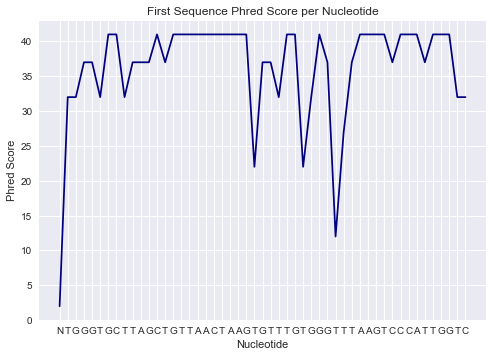

In [6]:
# Look at a test sequence
first_test_seq = next(record_iterator)

print(first_test_seq.name)
print(first_test_seq.seq)
print(first_test_seq.letter_annotations['phred_quality'])

plt.plot(np.arange(len(first_test_seq.seq)), 
         first_test_seq.letter_annotations['phred_quality'], c='navy')
plt.xticks(np.arange(len(first_test_seq.seq)), [str(x) for x in first_test_seq.seq])
plt.xlabel('Nucleotide')
plt.ylabel('Phred Score')
plt.title("First Sequence Phred Score per Nucleotide")
plt.show()

K00153:121:H7LYMBBXX:7:1101:5020:1121
NGATAATCATTGTAGTGATCTGGTCAATACTGTATCTAACTCTGGAAGATT
[2, 32, 32, 37, 37, 41, 37, 41, 41, 27, 37, 27, 41, 41, 37, 41, 37, 41, 41, 41, 41, 41, 41, 37, 41, 41, 41, 41, 41, 41, 41, 32, 41, 41, 41, 41, 41, 41, 41, 41, 32, 32, 41, 37, 41, 41, 41, 41, 41, 37, 41]


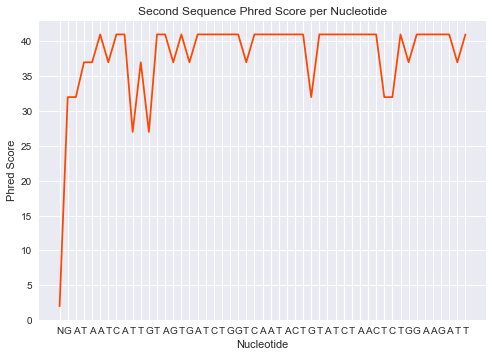

In [7]:
# Look at another test sequence
second_test_seq = next(record_iterator)

print(second_test_seq.name)
print(second_test_seq.seq)
print(second_test_seq.letter_annotations['phred_quality'])

# Plot the phred score as a function of nucleotide position
plt.plot(np.arange(len(second_test_seq.seq)), 
         second_test_seq.letter_annotations['phred_quality'], c='orangered')
plt.xticks(np.arange(len(second_test_seq.seq)), [str(x) for x in second_test_seq.seq])
plt.xlabel('Nucleotide')
plt.ylabel('Phred Score')
plt.title("Second Sequence Phred Score per Nucleotide")
plt.show()

The first nucleotide of each sequence appears to have a very low phred score. It is found that the first five letters are the most error prone (average phred score from 32-37) while the rest of the phred scores are >40 (1 error every 10,000 nucleotides). If nucleotides 5-50 of each sequence is used, higher fidelity will be used to construct sequences.

In [114]:
# Read in the sequence data from Poliovirus 3, day 3, spleen
PV3_d3_SP_files = glob.glob('../../data/sequence/Mice_passage/processed_poliovirus/*WTC_d3_SP*')
PV3_d3_SP_files

['../../data/sequence/Mice_passage/processed_poliovirus/group_1_sample_3_WTC_d3_SP_BC24_S56_L007_R1_001.pnBINOM95.txt',
 '../../data/sequence/Mice_passage/processed_poliovirus/group_1_sample_2_WTC_d3_SP_BC25_S57_L007_R1_001.pnBINOM95.txt',
 '../../data/sequence/Mice_passage/processed_poliovirus/group_1_sample_1_WTC_d3_SP_BC27_S58_L007_R1_001.pnBINOM95.txt']

In [115]:
df_pv3 = pd.read_csv(PV3_d3_SP_files[2], delimiter='\t')

In [116]:
df_pv3.head()

,Sequence,Pos,Nucl,A,C,G,T,N,-,g-,...,down_psi,up_psi,Qdown_psi,Qup_psi,down_sd,up_sd,Qdown_sd,Qup_sd,genotype,Qgenotype
0,Mahoney_WTpribPxpa,18,T,1,1,0,328,0,0,0,...,0.0,0.5,0.0,0.0,1.06072,48.5251,1.05255,49.3087,0.0,0.0
1,Mahoney_WTpribPxpa,19,T,1,0,0,356,1,0,0,...,0.0,0.5,0.0,0.0,1.06071,52.6456,1.05253,53.4416,0.0,0.0
2,Mahoney_WTpribPxpa,20,G,1,0,392,1,0,0,0,...,0.0,0.5,0.0,0.0,1.06069,57.9405,1.05252,58.9092,0.0,0.0
3,Mahoney_WTpribPxpa,22,A,423,1,0,0,0,0,0,...,0.0,0.5,0.0,0.0,1.06068,62.3255,1.05251,63.4135,0.0,0.0
4,Mahoney_WTpribPxpa,24,C,1,775,1,0,0,0,0,...,0.0,0.5,0.0,0.0,1.06061,114.2090,1.05974,114.3550,0.0,0.0


In [117]:
num_nuc = df_pv3.shape[0]
df_pv3.columns

Index(['Sequence', 'Pos', 'Nucl', 'A', 'C', 'G', 'T', 'N', '-', 'g-', 'QA',
       'QC', 'QG', 'QT', 'QN', 'Q-', 'Qg-', 'alt', 'psi', 'Qpsi', 'down_psi',
       'up_psi', 'Qdown_psi', 'Qup_psi', 'down_sd', 'up_sd', 'Qdown_sd',
       'Qup_sd', 'genotype', 'Qgenotype'],
      dtype='object')

In [136]:
# Create list to store nucleotide data
pv3_motif = []
nucs = ['A','C','G','T']
for i in range(num_nuc):
    loc_dict = {}
    for nuc in nucs:
        loc_dict[nuc] = df_pv3.iloc[i][nuc]
    pv3_motif.append(loc_dict)
pv3_motif[0]

[{'A': 1, 'C': 1, 'G': 0, 'T': 328},
 {'A': 1, 'C': 0, 'G': 0, 'T': 356},
 {'A': 1, 'C': 0, 'G': 392, 'T': 1},
 {'A': 423, 'C': 1, 'G': 0, 'T': 0},
 {'A': 1, 'C': 775, 'G': 1, 'T': 0},
 {'A': 0, 'C': 893, 'G': 0, 'T': 1},
 {'A': 1, 'C': 967, 'G': 0, 'T': 0},
 {'A': 2, 'C': 1027, 'G': 1, 'T': 0},
 {'A': 1149, 'C': 1, 'G': 0, 'T': 1},
 {'A': 1, 'C': 0, 'G': 1155, 'T': 1},
 {'A': 2, 'C': 1, 'G': 1165, 'T': 0},
 {'A': 0, 'C': 1203, 'G': 1, 'T': 1},
 {'A': 2, 'C': 1231, 'G': 0, 'T': 0},
 {'A': 1356, 'C': 0, 'G': 0, 'T': 1},
 {'A': 0, 'C': 1417, 'G': 0, 'T': 2},
 {'A': 1, 'C': 0, 'G': 1, 'T': 1546},
 {'A': 0, 'C': 0, 'G': 1581, 'T': 1},
 {'A': 1, 'C': 0, 'G': 1899, 'T': 0},
 {'A': 2, 'C': 2134, 'G': 0, 'T': 1},
 {'A': 1, 'C': 0, 'G': 2354, 'T': 1},
 {'A': 0, 'C': 0, 'G': 2413, 'T': 2},
 {'A': 1, 'C': 2504, 'G': 0, 'T': 0},
 {'A': 0, 'C': 6, 'G': 0, 'T': 2905},
 {'A': 3292, 'C': 1, 'G': 0, 'T': 0},
 {'A': 1, 'C': 1, 'G': 4898, 'T': 0},
 {'A': 0, 'C': 0, 'G': 6, 'T': 4981},
 {'A': 5017, 'C': 5

In [147]:
# Create a list of probabilities for each nucleotide
pv3_prop = []
pv3_bit = []
for i in range(num_nuc):
    loc_dict = {}
    bit_dict = {}
    total_nucs = sum(pv3_motif[i].values())
    for nuc in nucs:
        temp_prop = pv3_motif[i][nuc] / total_nucs
        loc_dict[nuc] = temp_prop
        bit_dict[nuc] = -temp_prop * np.log(temp_prop)
    pv3_prop.append(loc_dict)
    pv3_bit.append(bit_dict)

/Users/adam/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/adam/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [146]:
pv3_prop

[{'A': 0.0030303030303030303,
  'C': 0.0030303030303030303,
  'G': 0.0,
  'T': 0.9939393939393939},
 {'A': 0.0028011204481792717, 'C': 0.0, 'G': 0.0, 'T': 0.99719887955182074},
 {'A': 0.0025380710659898475,
  'C': 0.0,
  'G': 0.99492385786802029,
  'T': 0.0025380710659898475},
 {'A': 0.99764150943396224, 'C': 0.0023584905660377358, 'G': 0.0, 'T': 0.0},
 {'A': 0.001287001287001287,
  'C': 0.99742599742599747,
  'G': 0.001287001287001287,
  'T': 0.0},
 {'A': 0.0, 'C': 0.99888143176733779, 'G': 0.0, 'T': 0.0011185682326621924},
 {'A': 0.0010330578512396695, 'C': 0.99896694214876036, 'G': 0.0, 'T': 0.0},
 {'A': 0.0019417475728155339,
  'C': 0.99708737864077668,
  'G': 0.00097087378640776695,
  'T': 0.0},
 {'A': 0.99826238053866201,
  'C': 0.00086880973066898344,
  'G': 0.0,
  'T': 0.00086880973066898344},
 {'A': 0.00086430423509075197,
  'C': 0.0,
  'G': 0.99827139152981847,
  'T': 0.00086430423509075197},
 {'A': 0.0017123287671232876,
  'C': 0.00085616438356164379,
  'G': 0.99743150684931

In [120]:
# Assemble consensus sequence
pv3_consensus = ''
for i in range(num_nuc):
    test_seq = pv3_motif[i]
    max_val = max(test_seq.values())
    for key, value in test_seq.items():
        if value == max_val:
            pv3_consensus += key

In [121]:
PV1 = Seq.Seq(pv3_consensus)
PV1_RNA = PV1.transcribe()

In [122]:
for i in range(len(PV1_RNA)):
    temp_codon = PV1_RNA[i:i+3]
    shifted_region = 743 - 28 + 7
    if temp_codon == 'AUG' and i in np.arange(shifted_region-20, shifted_region+20):
        polyprotein_RNA = PV1_RNA[i:]

In [123]:
# Find the end of the polyprotein
polyprotein_end = 0
for i in range(0, len(polyprotein_RNA), 3):
    temp_end = polyprotein_RNA[i:i+3]
    if temp_end.translate() == '*':
        print(i)
        polyprotein = polyprotein_RNA[:i].translate()
        break

6627


In [124]:
print(str(polyprotein))

MGAQVSSQKVGAHENSNRAYGGSTINYTTINYYRDSASNAASKQDFSQDPSKFTEPIKDVLIKTAPMLNSPNIEACGYSDRVLQLTLGNSTITTQEAANSVVAYGRWPEYLRDSEANPVDQPTEPDVAACRFYTLDTVSWTKESRGWWWKLPDALRDMGLFGQNMYYHYLGRSGYTVHVQCNASKFHQGALGVFAVPEMCLAGDSNTTTMHTSYQNANPGEKGGTFTGTFTPDNNQTSPARRFCPVDYLLGNGTLLGNAFVFPHQIINLRTNNCATLVLPYVNSLSIDSMVKHNNWGIAILPLAPLNFASESSPEIPITLTIAPMCCEFNGLRNITLPRLQGLPVMNTPGSNQYLTADNFQSPCALPEFDVTPPIDIPGEVKNMMELAEIDTMIPFDLSATKKNTMEMYRVRLSDKPHTDDPILCLSLSPASDPRLSHTMLGEILNYYTHWAGSLKFTFLFCGSMMATGKLLVSYAPPGADPPKKRKEAMLGTHVIWDIGLQSSCTMVVPWISNTTYRQTIDDSFTEGGYISVFYQTRIVVPLSTPREMDILGFVSACNDFSVRLLRDTTHIEQKALAQGLGQMLESMIDNTVRETVGAATSRDALPNTEASGPTHSKEIPALTAVETGATNPLVPSDTVQTRHVVQHRSRSESSIESFFARGACVTIMTVDNPASTTNKDKLFAVWKITYKDTVQLRRKLEFFTYSRFDMELTFVVTANFTETNNGHALNQVYQIMYVPPGAPVPEKWDDYTWQTSSNPSIFYTYGTAPARISVPYVGISNAYSHFYDGFSKVPLKDQSAALGDSLYGAASLNDFGILAVRVVNDHNPTKVTSKIRVYLKPKHIRVWCPRPPRAVAYYGPGVDYKDGTLTPLSTKDLTTYGFGHQNKAVYTAGYKICNYHLATQDDLQNAVNVMWSRDLLVTESRAQGTDSIARCNCNAGVYYCESRRKYYPVSFVGPTFQYMEANNYYPARYQSHMLIGHGFASPGDCGGILRCHHGV

In [125]:
WTC_d3_SP_3 = polyprotein

In [127]:
# Test for mismatches in the polyprotein
for i in range(len(WTC_d3_SP_1)):
    if WTC_d3_SP_1[i] != WTC_d3_SP_2[i]:
        print('Mismatch 1-2 %s%d%s' % (WTC_d3_SP_1[i], i+1, WTC_d3_SP_2[i]))
        
    if WTC_d3_SP_1[i] != WTC_d3_SP_3[i]:
        print('Mismatch 1-3 %s%d%s' % (WTC_d3_SP_1[i], i+1, WTC_d3_SP_3[i]))
        
    if WTC_d3_SP_2[i] != WTC_d3_SP_3[i]:
        print('Mismatch 2-3 %s%d%s' % (WTC_d3_SP_2[i], i+1, WTC_d3_SP_3[i]))

Low frequency sequences may be being ignored, 